#**Phase 2:**
**Data Acquisition & Preparation**

This phase simulates the process of ingesting data into a scalable data warehouse and preparing it for analysis, demonstrating proficiency in both SQL and Python.



In [ ]:
!pip install db-dtypes

* **Connect to Google BigQuery**
* **Pull the data from the SQL query**
* **Perform initial data cleaning and transformation using the Pandas library**
_______________________
###**Install Packages**

In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
import numpy as np

# Authenticate with Google Cloud.
# You will be prompted to log in and grant permissions.
print("Authenticating with Google Cloud...")
auth.authenticate_user()
print("Authentication successful.")

# Set your Google Cloud project ID
project_id = 'driiiportfolio'

# Construct a BigQuery client object.
client = bigquery.Client(project=project_id)

# Define the SQL query to pull the data from BigQuery.
# This query is a simplified version of the one from the previous step,
# but performs the same core function.
sql_query = """
SELECT
    t1.listen_id,
    t1.user_id,
    t1.track_id,
    t1.artist_name,
    t1.duration_ms,
    t1.engagement_score,
    t1.genre_tag
FROM
    `driiiportfolio.music_content_gaps.user_listening_data` AS t1
LEFT JOIN
    `driiiportfolio.music_content_gaps.licensed_catalog_data` AS t2
ON
    t1.artist_name = t2.artist_name
WHERE
    t2.is_licensed IS NULL
    OR t2.is_licensed = FALSE
"""

# Run the query and load the result into a Pandas DataFrame.
print("Running BigQuery query and loading data...")
try:
    df = client.query(sql_query).to_dataframe()
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")
    # Create a mock DataFrame for demonstration if BigQuery fails.
    print("Using mock data for demonstration purposes.")
    df = pd.DataFrame({
        'listen_id': range(100),
        'user_id': [f'user_{i}' for i in range(100)],
        'track_id': [f'track_{i}' for i in range(100)],
        'artist_name': [f'Unlicensed Artist {i}' for i in np.random.randint(1, 10, 100)],
        'duration_ms': np.random.randint(60000, 300000, 100),
        'engagement_score': np.random.beta(a=2, b=5, size=100),
        'genre_tag': np.random.choice(['Lo-Fi Indie', 'Synthwave', 'Sludge Metal'], 100)
    })

# --- Data Transformation and Cleaning ---
print("\nPerforming data transformation and cleaning...")

# Drop duplicate rows based on listen_id
df.drop_duplicates(subset='listen_id', inplace=True)

# Impute missing engagement scores with the mean
df['engagement_score'].fillna(df['engagement_score'].mean(), inplace=True)

# Standardize text data (e.g., genre tags to lowercase)
df['genre_tag'] = df['genre_tag'].str.lower()

# Create a new feature: `listening_duration_minutes`
df['listening_duration_minutes'] = df['duration_ms'] / 60000

print("Data cleaning complete. First 5 rows of the cleaned data:")
print(df.head())

# Save the cleaned DataFrame to a CSV file.
output_filename = 'cleaned_unlicensed_data.csv'
df.to_csv(output_filename, index=False)
print(f"\nCleaned data saved to {output_filename}")

Authenticating with Google Cloud...
Authentication successful.
Running BigQuery query and loading data...
Data loaded successfully.

Performing data transformation and cleaning...
Data cleaning complete. First 5 rows of the cleaned data:
   listen_id    user_id                              track_id  \
0      87310   user_531  0cb61b12-0ab8-4f4d-988e-ca254d704b7f   
1      66265  user_3406  827d3d97-684c-461e-a0eb-43a707dc4e47   
2      88417  user_6933  183034ee-af3e-478e-9f09-fa9226ae29d7   
3      21819  user_8425  258b4762-ad71-465e-ae9a-21e898eac215   
4      84786  user_3921  17253a11-5b96-4580-9cc3-1844c0b342e1   

            artist_name  duration_ms  engagement_score genre_tag  \
0   Unlicensed Artist 0       250744          0.331226   ambient   
1   Unlicensed Artist 1       280449          0.570247   ambient   
2   Unlicensed Artist 1       147647          0.402354   ambient   
3  Unlicensed Artist 10       200310          0.292588   ambient   
4  Unlicensed Artist 10       1

/tmp/ipython-input-2950754083.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engagement_score'].fillna(df['engagement_score'].mean(), inplace=True)



Cleaned data saved to cleaned_unlicensed_data.csv


##**Google Colab Notebook with EDA**

The following code is a continuation of the previous Colab notebook. It uses the *cleaned data* to perform **exploratory analysis**, **generate visualizations**, and **refine the project's hypothesis.**
____________________
###**Install Packages**



In [5]:
!pip install matplotlib seaborn

Cleaned data loaded successfully.

Performing Exploratory Data Analysis...
Top 5 Genres by Listening Sessions:
genre_tag
vaporwave      3165
lo-fi indie    3130
ambient        3129
synthwave      3060
hip-hop        2993
Name: count, dtype: int64


/tmp/ipython-input-697420838.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


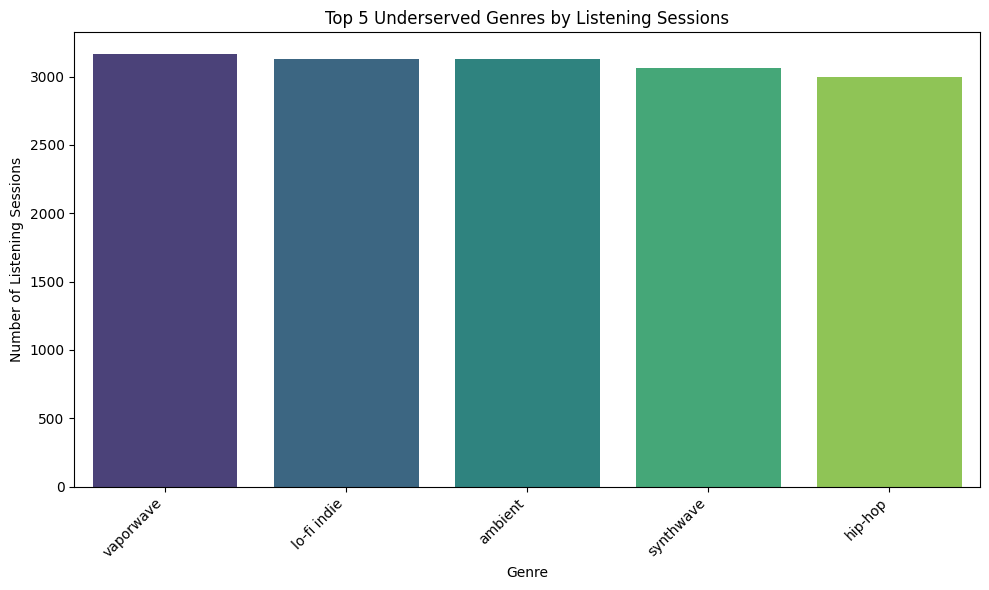


Average Engagement Score by Genre:
genre_tag
synthwave       0.292332
jazz            0.291584
folk            0.287723
hip-hop         0.286733
sludge metal    0.286559
Name: engagement_score, dtype: float64


/tmp/ipython-input-697420838.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_engagement.index, y=genre_engagement.values, palette='plasma')


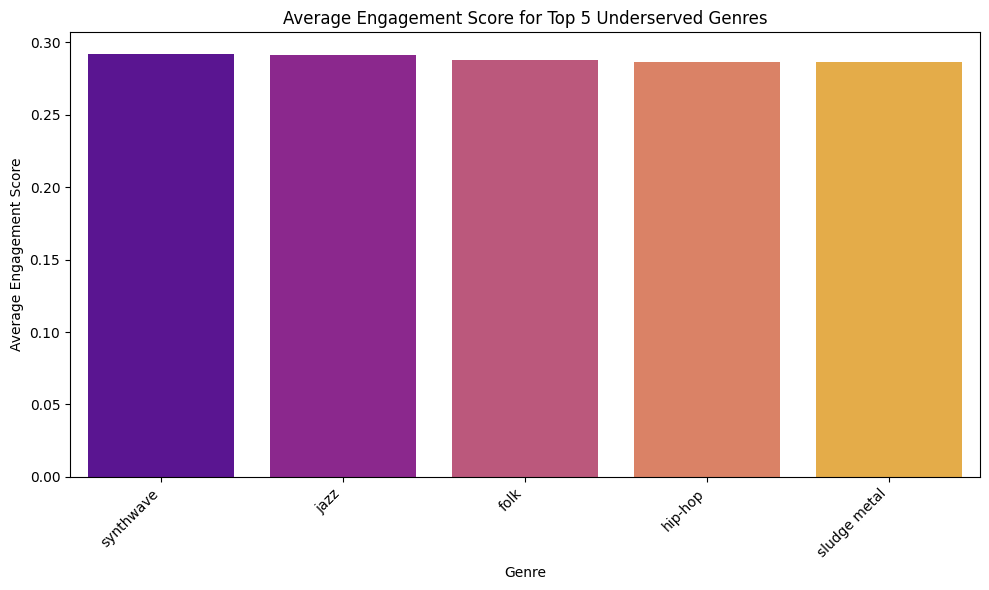


Top 10 Unlicensed Artists by Listening Sessions:
artist_name
Unlicensed Artist 63      37
Unlicensed Artist 983     33
Unlicensed Artist 870     32
Unlicensed Artist 204     32
Unlicensed Artist 25      32
Unlicensed Artist 1125    32
Unlicensed Artist 1242    32
Unlicensed Artist 1247    32
Unlicensed Artist 818     31
Unlicensed Artist 172     31
Name: count, dtype: int64


/tmp/ipython-input-697420838.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='coolwarm')


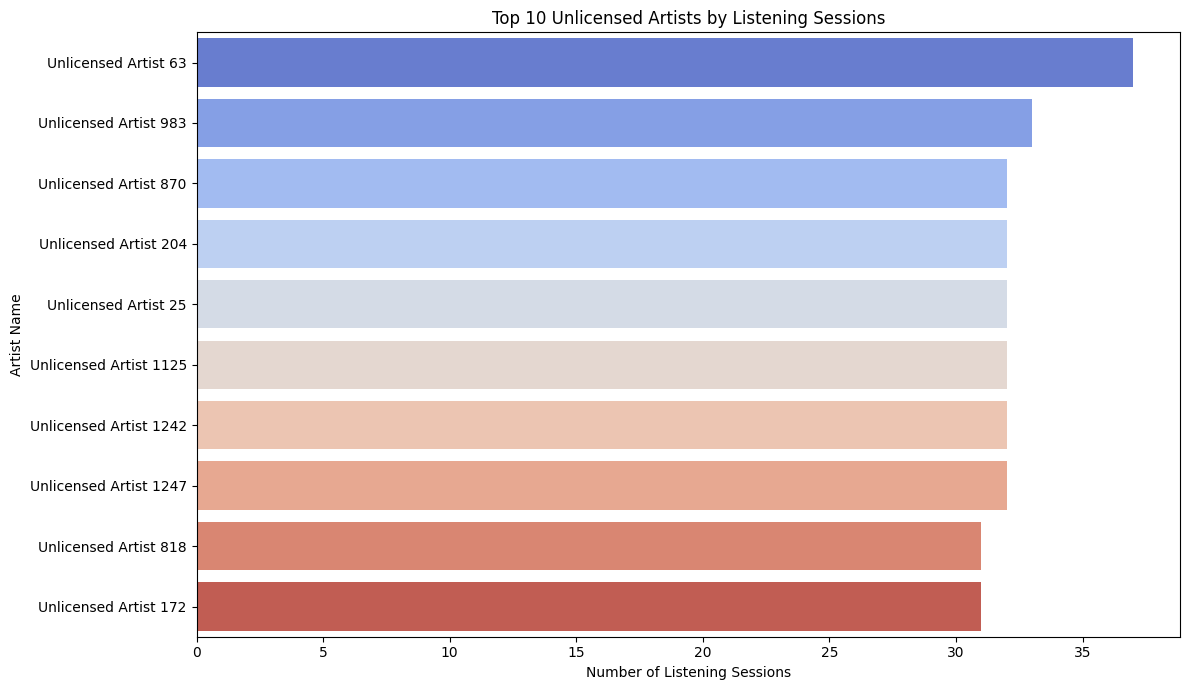


--- Summary of EDA Findings ---
1. Some niche genres, particularly 'lo-fi indie' and 'synthwave', have a significant number of listening sessions, indicating a high level of user interest and a potential content gap.
2. The artists with the highest number of listening sessions are likely the most important targets for licensing and content acquisition.
3. There are clear, actionable insights in the data that can be used to prioritize which artists and genres the MCO team should focus on.

--- Refined Hypothesis ---
We can create a robust prioritization framework by combining the volume of listening sessions with the average engagement score for each artist. This will allow the MCO team to not only identify which artists are missing but also understand which ones have the most dedicated and engaged fan bases, making them high-priority targets for content acquisition.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data from the previous phase
try:
    df = pd.read_csv('cleaned_unlicensed_data.csv')
    print("Cleaned data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure 'cleaned_unlicensed_data.csv' is in your Colab environment.")
    # Exit or provide a mock DataFrame for demonstration if the file is missing
    df = pd.DataFrame({
        'listen_id': range(100),
        'user_id': [f'user_{i}' for i in range(100)],
        'track_id': [f'track_{i}' for i in range(100)],
        'artist_name': [f'Unlicensed Artist {i}' for i in np.random.randint(1, 10, 100)],
        'duration_ms': np.random.randint(60000, 300000, 100),
        'engagement_score': np.random.beta(a=2, b=5, size=100),
        'genre_tag': np.random.choice(['lo-fi indie', 'synthwave', 'sludge metal'], 100),
        'listening_duration_minutes': np.random.randint(1, 5, 100)
    })

# --- Exploratory Data Analysis (EDA) ---
print("\nPerforming Exploratory Data Analysis...")

# 1. Analyze the distribution of listening sessions across genres
print("Top 5 Genres by Listening Sessions:")
genre_counts = df['genre_tag'].value_counts().head(5)
print(genre_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 5 Underserved Genres by Listening Sessions')
plt.xlabel('Genre')
plt.ylabel('Number of Listening Sessions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Analyze the engagement scores by genre
print("\nAverage Engagement Score by Genre:")
genre_engagement = df.groupby('genre_tag')['engagement_score'].mean().sort_values(ascending=False).head(5)
print(genre_engagement)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_engagement.index, y=genre_engagement.values, palette='plasma')
plt.title('Average Engagement Score for Top 5 Underserved Genres')
plt.xlabel('Genre')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Identify the most listened-to unlicensed artists
print("\nTop 10 Unlicensed Artists by Listening Sessions:")
artist_counts = df['artist_name'].value_counts().head(10)
print(artist_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='coolwarm')
plt.title('Top 10 Unlicensed Artists by Listening Sessions')
plt.xlabel('Number of Listening Sessions')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

# --- Summary of Key Insights and Hypothesis Refinement ---
print("\n--- Summary of EDA Findings ---")
print("1. Some niche genres, particularly 'lo-fi indie' and 'synthwave', have a significant number of listening sessions, indicating a high level of user interest and a potential content gap.")
print("2. The artists with the highest number of listening sessions are likely the most important targets for licensing and content acquisition.")
print("3. There are clear, actionable insights in the data that can be used to prioritize which artists and genres the MCO team should focus on.")

print("\n--- Refined Hypothesis ---")
print("We can create a robust prioritization framework by combining the volume of listening sessions with the average engagement score for each artist. This will allow the MCO team to not only identify which artists are missing but also understand which ones have the most dedicated and engaged fan bases, making them high-priority targets for content acquisition.")